# Leetcode

1396. Design Underground System

https://leetcode.com/problems/design-underground-system/

**Description**

    An underground railway system is keeping track of customer travel times between different stations. They are using this data to calculate the average time it takes to travel from one station to another.

    Implement the UndergroundSystem class:

    void checkIn(int id, string stationName, int t)
    A customer with a card ID equal to id, checks in at the station stationName at time t.
    A customer can only be checked into one place at a time.
    void checkOut(int id, string stationName, int t)
    A customer with a card ID equal to id, checks out from the station stationName at time t.
    double getAverageTime(string startStation, string endStation)
    Returns the average time it takes to travel from startStation to endStation.
    The average time is computed from all the previous traveling times from startStation to endStation that happened directly, meaning a check in at startStation followed by a check out from endStation.
    The time it takes to travel from startStation to endStation may be different from the time it takes to travel from endStation to startStation.
    There will be at least one customer that has traveled from startStation to endStation before getAverageTime is called.
    You may assume all calls to the checkIn and checkOut methods are consistent. If a customer checks in at time t1 then checks out at time t2, then t1 < t2. All events happen in chronological order.

**Examples**
 

    Example 1:

    Input
    ["UndergroundSystem","checkIn","checkIn","checkIn","checkOut","checkOut","checkOut","getAverageTime","getAverageTime","checkIn","getAverageTime","checkOut","getAverageTime"]
    [[],[45,"Leyton",3],[32,"Paradise",8],[27,"Leyton",10],[45,"Waterloo",15],[27,"Waterloo",20],[32,"Cambridge",22],["Paradise","Cambridge"],["Leyton","Waterloo"],[10,"Leyton",24],["Leyton","Waterloo"],[10,"Waterloo",38],["Leyton","Waterloo"]]

    Output
    [null,null,null,null,null,null,null,14.00000,11.00000,null,11.00000,null,12.00000]

    Explanation
    UndergroundSystem undergroundSystem = new UndergroundSystem();
    undergroundSystem.checkIn(45, "Leyton", 3);
    undergroundSystem.checkIn(32, "Paradise", 8);
    undergroundSystem.checkIn(27, "Leyton", 10);
    undergroundSystem.checkOut(45, "Waterloo", 15);  // Customer 45 "Leyton" -> "Waterloo" in 15-3 = 12
    undergroundSystem.checkOut(27, "Waterloo", 20);  // Customer 27 "Leyton" -> "Waterloo" in 20-10 = 10
    undergroundSystem.checkOut(32, "Cambridge", 22); // Customer 32 "Paradise" -> "Cambridge" in 22-8 = 14
    undergroundSystem.getAverageTime("Paradise", "Cambridge"); // return 14.00000. One trip "Paradise" -> "Cambridge", (14) / 1 = 14
    undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 11.00000. Two trips "Leyton" -> "Waterloo", (10 + 12) / 2 = 11
    undergroundSystem.checkIn(10, "Leyton", 24);
    undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 11.00000
    undergroundSystem.checkOut(10, "Waterloo", 38);  // Customer 10 "Leyton" -> "Waterloo" in 38-24 = 14
    undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 12.00000. Three trips "Leyton" -> "Waterloo", (10 + 12 + 14) / 3 = 12
    Example 2:

    Input
    ["UndergroundSystem","checkIn","checkOut","getAverageTime","checkIn","checkOut","getAverageTime","checkIn","checkOut","getAverageTime"]
    [[],[10,"Leyton",3],[10,"Paradise",8],["Leyton","Paradise"],[5,"Leyton",10],[5,"Paradise",16],["Leyton","Paradise"],[2,"Leyton",21],[2,"Paradise",30],["Leyton","Paradise"]]

    Output
    [null,null,null,5.00000,null,null,5.50000,null,null,6.66667]

    Explanation
    UndergroundSystem undergroundSystem = new UndergroundSystem();
    undergroundSystem.checkIn(10, "Leyton", 3);
    undergroundSystem.checkOut(10, "Paradise", 8); // Customer 10 "Leyton" -> "Paradise" in 8-3 = 5
    undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 5.00000, (5) / 1 = 5
    undergroundSystem.checkIn(5, "Leyton", 10);
    undergroundSystem.checkOut(5, "Paradise", 16); // Customer 5 "Leyton" -> "Paradise" in 16-10 = 6
    undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 5.50000, (5 + 6) / 2 = 5.5
    undergroundSystem.checkIn(2, "Leyton", 21);
    undergroundSystem.checkOut(2, "Paradise", 30); // Customer 2 "Leyton" -> "Paradise" in 30-21 = 9
    undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 6.66667, (5 + 6 + 9) / 3 = 6.66667
 

**Constraints**

    1 <= id, t <= 106
    1 <= stationName.length, startStation.length, endStation.length <= 10
    All strings consist of uppercase and lowercase English letters and digits.
    There will be at most 2 * 104 calls in total to checkIn, checkOut, and getAverageTime.
    Answers within 10-5 of the actual value will be accepted.

In [159]:
class UndergroundSystem:

    def __init__(self):
        self.system_dict= {}
        self.cal_dict = {}
        

    def checkIn(self, Id: int, stationName: str, t: int)->None:
        self.system_dict[Id] = [stationName,t]
        return
    
    def checkOut(self, Id: int, stationName: str, t: int)->None:
        time = abs(self.system_dict[Id][1] - t)
        print(time)
        
        if self.system_dict[Id][0]+'-'+stationName not in self.cal_dict.keys():
            self.cal_dict[self.system_dict[Id][0]+'-'+stationName] = [time]              
        else :
            self.cal_dict[self.system_dict[Id][0]+'-'+stationName].append(time)

        return time

    def getAverageTime(self, startStation: str, endStation: str)->None:
        
        if len(self.cal_dict[startStation+'-'+endStation]) !=0:
            print(sum(self.cal_dict[startStation+'-'+endStation]) / len(self.cal_dict[startStation+'-'+endStation]))
            return sum(self.cal_dict[startStation+'-'+endStation]) / len(self.cal_dict[startStation+'-'+endStation])

In [160]:
undergroundSystem = UndergroundSystem()

In [161]:
undergroundSystem.checkIn(45, "Leyton", 3);
undergroundSystem.checkIn(32, "Paradise", 8);
undergroundSystem.checkIn(27, "Leyton", 10);

In [162]:
undergroundSystem.checkOut(45, "Waterloo", 15);
undergroundSystem.checkOut(27, "Waterloo", 20);
undergroundSystem.checkOut(32, "Cambridge", 22);
undergroundSystem.getAverageTime("Paradise", "Cambridge");
undergroundSystem.getAverageTime("Leyton", "Waterloo"); 
undergroundSystem.checkIn(10, "Leyton", 24);
undergroundSystem.getAverageTime("Leyton", "Waterloo"); 
undergroundSystem.checkOut(10, "Waterloo", 38);
undergroundSystem.getAverageTime("Leyton", "Waterloo"); 

12
10
14
14.0
11.0
11.0
14
12.0


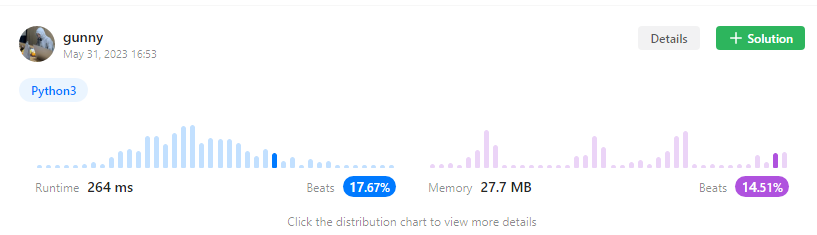